# Appendix D - Review of Estimation and Inference

Joshua French

To open this information in an interactive Colab notebook, click or scan the QR code below.

<a href="https://colab.research.google.com/github/jfrench/LinearRegression/blob/master/notebooks/d-estimation-inference-review-notebook.ipynb"> <img src="https://raw.githubusercontent.com/jfrench/LinearRegression/3e668cdd00feb7e8eed6fa0ff7af469e40e4c6a1/images/qr-estimation-inference-review.svg"> </a>

------------------------------------------------------------------------

A primary purpose of statistics is taking a sample of values from a population and using the sample to draw conclusions about that population. In what follows, we discuss statistical concepts related to estimation, hypothesis testing, and confidence intervals.

## Estimation

A **parameter** is a numeric characteristic that describes a population. E.g., the population mean, standard deviation, or cumulative distribution function.

The **target** parameter or **parameter of interest** is the population parameter we would like to estimate.

There are different kinds of estimates:

-   A **point estimate** is a single number that we *hope* is close to the true value of the target parameter.
-   An **interval estimate** is an interval of numbers that we *hope* will contain the target parameter.

An estimate and an estimator are different but related concepts.

-   An estimate is a specific number (for a point estimate) or a specific range of numbers (for an interval estimate).
-   An **estimator** is a formula we use to calculate an estimate once we get a sample of data.

Once the data are observed, an estimate is fixed.

An estimator is a random variable. An estimator produces different estimates based on the sample of data we obtain from the population.

The **sampling distribution** of an estimator is the distribution of the estimates we get when we use the estimator to compute estimates from all possible samples of a fixed size $n$ from the population of interest.

A point estimator, $\hat{\theta}$, is an **unbiased estimator** of a target parameter, $\theta$, if $E(\hat{\theta})=\theta$. An estimator is biased if it is not biased.

The **bias** of an estimator is defined as

$$
B(\hat{\theta})=E(\hat{\theta})-\theta.
$$

The **variance of an estimator** is defined as

$$
\mathrm{var}(\hat{\theta})=E[\hat{\theta}-E(\hat{\theta})]^2.
$$

The **standard error of an estimator** is the standard deviation of the estimator, i.e., $$
\mathrm{se}(\hat{\theta})\equiv\mathrm{sd}(\hat{\theta})=\sqrt{\mathrm{var}(\hat{\theta})}.
$$

Typically, we cannot compute the standard error of an estimator because it is a function of parameters that we do not know.

Instead, we use the sample data to estimate the standard error. When we hear or read the term “standard error”, we must carefully determine whether the “standard error” presented is the theoretical standard error or the estimated standard error (and it’s nearly always the latter).

The **mean square error** of a point estimator is $$
MSE(\hat{\theta})=E(\hat{\theta}-\theta)^{2},
$$ which is equivalent to $$
MSE(\hat{\theta})=\mathrm{var}(\hat{\theta})+[B(\hat{\theta})]^{2}.
$$

The MSE formula makes it clear that there is a “bias-variance trade off” when choosing between point estimators. Typically, unbiased point estimators will have larger variance (and correspondingly, MSE). Biased estimators will often have smaller MSE, but are (obviously) biased. It’s a trade off we have to balance.

**Example**

Let $Y_1, Y_2, \ldots, Y_n \stackrel{i.i.d.}{\sim} \mathsf{N}(\mu, \sigma^2)$.

Determine the mean and variance of the estimator $\hat{\mu}=\bar{Y}$.

The mean of the estimator is

$$
\begin{aligned}
E(\bar{Y}) &= E\biggl(\frac{1}{n}\sum_{i=1}^n Y_i \biggr) & \tiny\text{(substitute definition of $\bar{Y}$)} \\
&= \frac{1}{n}E\biggl(\sum_{i=1}^n Y_i \biggr) & \tiny\text{(factor constant)} \\
&= \frac{1}{n}\sum_{i=1}^n E(Y_i) & \tiny\text{(linearity of expectation)} \\
&= \frac{1}{n}\sum_{i=1}^n \mu  & \tiny\text{(assumption about mean of $Y_i$ for $i=1,2,\ldots,n$)} \\
&= \frac{n}{n} \mu  & \tiny\text{(sum $\mu$ $n$ times)} \\
&= \mu. &
\end{aligned}
$$

The variance of the estimator is

$$
\begin{aligned}
\mathrm{var}(\bar{Y}) &= \mathrm{var}\biggl(\frac{1}{n}\sum_{i=1}^n Y_i \biggr) & \tiny\text{(substitute definition of $\bar{Y}$)} \\
&= \frac{1}{n^2}\mathrm{var}\biggl(\sum_{i=1}^n Y_i \biggr) & \tiny\text{(factor constant out of $\mathrm{var}$)} \\
&= \frac{1}{n^2}\sum_{i=1}^n \mathrm{var}(Y_i) & \tiny\text{(linearity of variance for independent random variables)} \\
&= \frac{1}{n^2}\sum_{i=1}^n \sigma^2  & \tiny\text{(assumption about variance of $Y_i$ for $i=1,2,\ldots,n$)} \\
&= \frac{n}{n^2} \sigma^2  & \tiny\text{(sum $\sigma^2$ $n$ times)} \\
&= \frac{\sigma^2}{n}. &
\end{aligned}
$$ Is the sample median a better or worse estimator of $\mu$ than the sample mean in this context?

To prove this, we would have to consider order statistics, which we will not do. Instead, we will investigate this using a simulation experiment.

We will sample 100 values from our population assuming $\mu=0$ and $\sigma^2 = 100$ and compare the properties of the sample mean and sample median for 10,000 independent samples.

We start by drawing 10,000 samples of size 100 from a $\mathsf{N}(0, 10^2)$ population, computing the sample mean and median, and then storing these values for further analysis.

In [ ]:
set.seed(1904) # set seed for reproducibility
nsamples <- 10000 # number of independent samples
n <- 100 # sample size
# store sample means and medians
sample_means <- numeric(nsamples)
sample_meds <- numeric(nsamples)
# perform experiment nsamples times
for (i in seq_len(nsamples)) {
  # draw sample
  y <- rnorm(n, mean = 0, sd = 10)
  # compute sample mean
  sample_means[i] <- mean(y)
  # compute and store sample median
  sample_meds[i] <- median(y)
}

We now plot the approximate sampling distributions of the sample mean and median using relative frequency histograms of their values from the 10,000 samples.

-   Setting the `probability` argument of the `hist` function to `TRUE` will produce a relative frequency histogram instead of the default frequency histogram.
-   We also set the `breaks` argument to `100` to ask the `hist` function to use approximately 100 bins.

In [ ]:
par(mfrow = c(1, 2)) # side-by-side histograms
hist(sample_means, probability = TRUE, breaks = 100,
     main = "sampling distribution of\n the sample means")
hist(sample_meds, probability = TRUE, breaks = 100,
     main = "sampling distribution of\n the sample medians")

Both sampling distributions appear to be approximately normal (and from statistical theory, we know that they are normally distributed).

We compute the sample mean and standard deviation of the two sets of statistics to approximate the expected value (mean) and standard error, respectively, of the statistics.

The estimated mean of the sampling distribution of the sample mean is 0.01, as shown below. We showed that the theoretical mean is 0, so this is a good approximation.

In [ ]:
mean(sample_means) # estimated mean of statistic

The estimated standard error of the sampling distribution of the sample mean is 1.00, as shown below. Recall that the theoretical standard error is 1 ($\sigma^2/n = 100/100 = 1$), so this is a good approximation.

In [ ]:
sd(sample_means) # estimated standard error of statistic

The estimated mean of the sampling distribution of the sample median is 0.01, as shown below. The theoretical mean is 0.

In [ ]:
mean(sample_meds)

The estimated standard error of the sampling distribution of the sample median is 1.24, as shown below. The asymptotic standard error is 1.2533, i.e., the theoretical standard error as $n\rightarrow\infty$ (see Wackerly, Mendhall, and Scheaffer 2008, sec. 9.2).

In [ ]:
sd(sample_meds)

Since both estimators are unbiased and the standard error of the sample mean is smaller than the sample median, this demonstrates that the sample mean is a more efficient estimator than the sample median in this context.

We overlay a normal curve (the solid orange lines) on each sampling distribution, using the mean and standard errors computed above for the mean and standard deviation, respectively, of the normal curve. Both curves fit well.

In [ ]:
par(mfrow = c(1, 2)) # side-by-side histograms
s <- seq(-10, 10, len = 10000) # sequence for plotting
hist(sample_means, probability = TRUE, breaks = 100, col = "lightgrey",
     main = "sampling distribution of\n the sample means")
# normal curve with estimated mean and standard error
lines(s, dnorm(s, mean = mean(sample_means), sd = sd(sample_means)), col = "orange", lwd = 2)
hist(sample_meds, probability = TRUE, breaks = 100, col = "lightgrey",
     main = "sampling distribution of\n the sample medians")
lines(s, dnorm(s, mean = mean(sample_meds), sd = sd(sample_meds)), col = "orange", lwd = 2)

## Hypothesis Testing

A **statistical test of hypotheses** or **hypothesis test** is a statistical procedure used to decide between a null hypothesis, $H_0$, and an alternative hypothesis, $H_a$ or $H_1$.

-   The null hypothesis is usually a hypothesis that “nothing interesting is going on”.
-   The alternative hypothesis is generally the complement of the null hypothesis and is usually what we want to show is true.

A **test statistic** is a number used to decide between $H_0$ and $H_a$.

-   A test statistic is a function of the data, and generally, parameters in the hypotheses.
-   A test statistic measures the compatibility of the observed data with $H_0$.
-   A “small” test statistic suggests the observed data are consistent with $H_0$.
-   An “extreme” test statistic indicates that the observed data are inconsistent with $H_0$, which we take as evidence that $H_a$ is true.

The **null distribution** allows us to identify the values of the test statistic that are typical or unusual when $H_0$ is true. Formally, the null distribution is the distribution of the test statistic under the assumption that $H_0$ is true.

There are two types of errors we can make when doing hypothesis testing:

-   Type I error: rejecting $H_0$ when $H_0$ is true.
-   Type II error: failing to reject $H_0$ when $H_a$ is true.

We can control the Type I error rate at a specified level, $\alpha$, called the **significance level**, since we know the distribution of our test statistic under the assumption that $H_0$ is true.

-   We reject $H_0$ and conclude that $H_a$ is true if the test statistic falls in the **rejection region** of the null distribution.
-   The rejection region is the set of test statistics that are the $100\alpha\%$ most unlikely test statistics if $H_0$ is true.

Instead of using the test statistic directly to decide between $H_0$ and $H_a$, we generally use the test statistic to compute a p-value.

-   The **p-value** of a test statistic is the probability of seeing a test statistic at least as supportive of $H_a$ when $H_0$ is true.

If we specify the significance level, $\alpha$, prior to performing our hypothesis test (which is the ethical thing to do), then we reject $H_0$ and conclude $H_a$ is true when the p-value $<\alpha$. Otherwise, we fail to reject $H_0$.

Researchers sometimes say that the smaller the p-value, the stronger the evidence that $H_a$ is true and $H_0$ is false. This isn’t definitively true because the p-value doesn’t have the ability to distinguish between the following options: (1) $H_0$ is true but our observed data were very unlikely, (2) $H_0$ is false.

When $H_0$ is true, then the test statistic (for simple hypotheses and continuous test statistics) has a uniform distribution over the interval \[0, 1\]. Conversely, if $H_a$ is true, then the p-value is more likely to be small, which makes us think $H_a$ is true for small p-values.

However, unless we know the **power** of our test, which is the probability that we reject $H_0$ when $H_a$ is true, then it is very difficult to assess how much evidence for $H_a$ a small p-value provides. Gibson (2021) point out the p-values can be interpreted naturally on a $\log_{10}$ scale. Gibson (2021) states:

> The p-value can be expressed as $p=c\times 10^{-k}$ so that $\log_{10}(p)=-\log_{10}(c)+k$, where $c$ is a constant and $k$ is an integer, which implies that only the magnitude *k* measures the actual strength of evidence (Boos and Stefanski 2011). $\ldots$ This would suggest that $p=0.01$ ($k=2$) could be interpreted as twice the evidence \[for $H_a$ as\] $p=0.10$ ($k=1$).

Gibson (2021) provides a thorough review of p-value interpretation. <a href="#tbl-pvalue-interp" class="quarto-xref">Table 1</a> summarizes common strength of evidence interpretations for p-values.

| p-value      | Interpretation                 |
|:-------------|:-------------------------------|
| $> 0.10$     | no evidence for $H_a$          |
| $\leq 0.10$  | weak evidence for $H_a$        |
| $\leq 0.05$  | moderate evidence for $H_a$    |
| $\leq 0.01$  | strong evidence for $H_a$      |
| $\leq 0.001$ | very strong evidence for $H_a$ |

Table 1: A summary of common strength-of-evidence interpretations for p-values.

**Simulation study**

We provide a brief simulation study to better understand the null distribution and also how rejection regions are chosen to control the type I error rate.

Assume that we sample $n=10$ values from a $\mathsf{N}(\mu, \sigma^2)$ population but that we don’t know the mean or the standard deviation.

Assume the hypotheses we want to test are $H_0: \mu = 2$ versus $H_a: \mu > 2$ (implicitly, the null hypothesis is $H_0: \mu \leq 2$).

In this context, it is common to use the test statistic $$
T^* = \frac{\bar{Y} - \mu}{s/\sqrt{n}},
$$ where $s$ is the sample standard deviation of the measurements.

If the null hypothesis is true, $\mu=2$, and statistical theory tells us that $T^* \sim t_{n-1}$, i.e., the test statistic has a $t$ distribution with $n-1$ degrees of freedom.

-   Since $n=10$, our test statistic has a $t$ distribution with 9 degrees of freedom if the null hypothesis is true.

Recall that the null distribution of a test statistic is its sampling distribution under the assumption that the null hypothesis is true.

To draw our sample, we must choose a value of $\sigma^2$. We will use $\sigma^2 = 4^2$. The exact value isn’t important, but choosing a fixed number for $\sigma^2$ is critical for the example below.

In the code below, we:

1.  Draw $B=1,000$ samples of size $n=10$ from our $\mathsf{N}(\mu,4^2)$ population assuming the null hypothesis is true, i.e., with $\mu = 2$.
2.  Compute the test statistic for each sample.

In [ ]:
# set number seed for reproducible results
set.seed(12)
# create vector to store test statistics
tstats <- numeric(10000)
# for 10,000 experiments
for (i in seq_len(10000)) {
  # draw a sample of size 10 from a N(2, 4^2)
  y <- rnorm(n = 10, mean = 2, sd = 4)
  # compute and store the test statistic for the sample
  tstats[i] <- (mean(y) - 2) / (sd(y) / sqrt(10))
}

We now use the code below to compute the empirical density of the computed test statistics and overlay the density of a $t$ distribution with 9 degrees of freedom.

We see that the two distributions match up very well.

In [ ]:
# plot empirical null distribution
plot(density(tstats),
     xlab = "test statistic",
     ylab = "density",
     main = "empirical versus true null distribution")
# sequence to plot null density over
s <- seq(-5, 5, len = 1000)
lines(s, dt(s, df = 9), lty = 2, col = "blue")

What should we takeaway from this example?

-   The null distribution of a hypothesis test is the sampling distribution of the test statistic under the assumption that $H_0$ is true.
-   We approximated the null distribution of our test statistic by drawing 10,000 samples from the population distribution under the assumption that $H_0$ was true.

How does the null distribution relate to choosing the rejection region?

The type I error rate is the probability of rejecting $H_0$ when $H_0$ is true.

-   Since we know the null distribution, we know what behavior to expect from our test statistic if $H_0$ is true.
-   Specifically, we know what test statistics are most unlikely if $H_0$ is true.

Let’s say we want to control the type I error at $\alpha = 0.05$.

For this upper-tailed test, we should reject $H_0$ when the test statistic is greater than $t^{0.05}_9$, i.e., the 0.95 quantile of a $t$ distribution with 9 degrees of freedom.

Why do we use this threshold?

-   Because if $H_0$ is true, this will only lead to erroneous rejections of $H_0$ (i.e., a type I error) 5% of the time.

In the code below, we compute the sample proportion of test statistics from our null distribution that are more than $t^{0.05}_9$. Our sample proportion is very close to 0.05, and this number will converge to 0.05 as we increase the number samples used in our simulation.

In [ ]:
mean(tstats > qt(0.95, df = 9))

**Example**

Suppose that $Y_1,\ldots,Y_n$ is a random sample (in other words, an independent and identically distributed sample) from a population having a normal distribution with unknown mean $\mu$ and variance $\sigma^2=1$.

We would like to decide between the following two hypotheses: $H_0:\mu=0$ and $H_a:\mu\neq 0$.

Consider the statistic $\bar{Y} = \frac{1}{n} \sum_{i=1}^n Y_i$.

If $H_0$ is true, then $\bar{Y} \sim \mathsf{N}(0,1/n)$ and the test statistic $$
Z^*=\bar{Y}/(1/\sqrt{n})=\sqrt{n}\bar{Y}\sim \mathsf{N}(0, 1),
$$

i.e., the null distribution of $Z^*$ is $\mathsf{N}(0,1)$.

If $\alpha=0.10$, then the 10% of test statistics that are most unlikely if $H_0$ is true (i.e., most supportive of $H_a$) are more extreme than $Z^{0.95}$ and $Z^{0.05}$, the 0.05 and 0.95 quantiles of a standard normal distribution, respectively.

-   The superscript in the quantile notation indicates the area to the right of the quantile in the CDF).

The 0.05 quantile of the standard normal distribution is -1.645 and the 0.95 quantile is 1.645.

In R, we can find these quantiles using the `qnorm` function, where the first argument of `qnorm` is `p`, which is the vector of probabilities to the LEFT of the quantile. We verify these quantiles using the code below.

In [ ]:
qnorm(c(0.05,0.95))

$H_0$ should be rejected when $Z^*$ is less than -1.645 or more than 1.65, i.e., the rejection region is $(-\infty, -1.645)\cup(1.645,\infty)$.

Alternatively, we could compute the p-value using the formula $2P(Z\geq |Z^*|)$ in order to make our choice between the hypotheses.

Suppose $z^*=1.74$ and $\alpha=0.10$. The test statistic is in the rejection region, so we would conclude that $H_a$ is true. We demonstrate this visually in the graphic below, shading the rejection region in grey. We represent the observed test statistic with a vertical line.

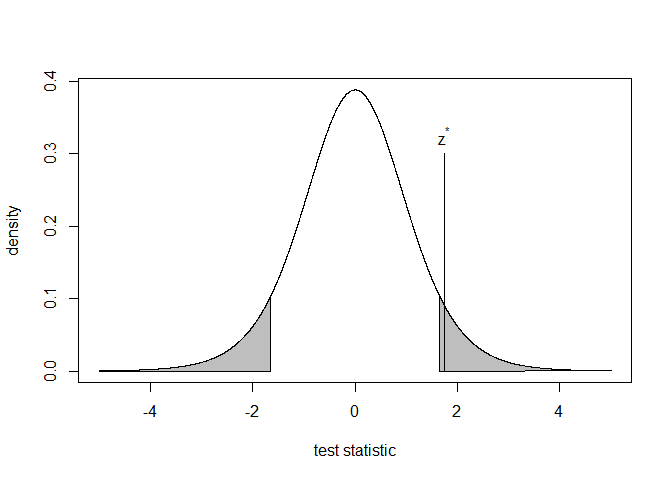

The p-value is $2P(Z\geq 1.74)=0.082$.

In R, we can compute the p-value using the code below.

In [ ]:
2 * (1 - pnorm(1.74))

Visually, the p-value is the sum of the area to the left of -1.74 and the area to the right of 1.74 because test statistics with those values are at least as supportive of $H_a$ as the observed statistic. We display this in the graphic below.

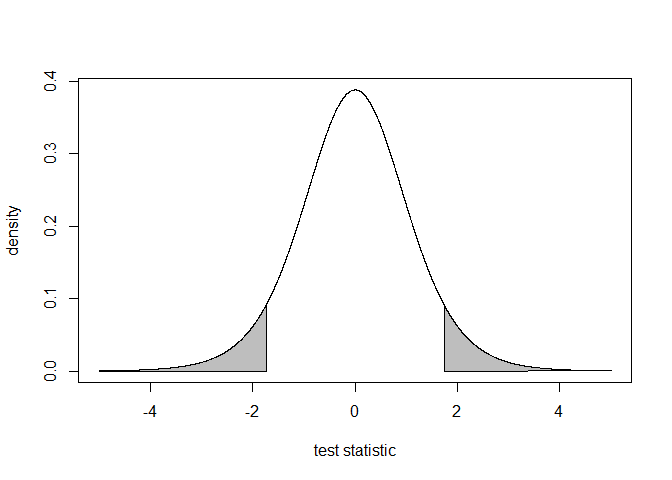

Using the p-value approach with $\alpha = 0.10$, we conclude that $H_a$ is true.

Note: the rejection region and p-value approaches to deciding between hypotheses will always agree.

In straightforward language, our interpretation could be: there is weak evidence that the population mean differs from 0.

## Confidence Intervals

A **confidence interval** provides us with plausible values of a target parameter. It is the most common type of interval estimator.

A confidence interval procedure has an associated **confidence level**.

-   When independent random samples are taken repeatedly from the population, a confidence interval procedure will produce intervals containing the target parameter with probability equal to the confidence level.

Confidence level is associated with a confidence interval *procedure*, not a specific interval.

A 95% confidence interval *procedure* will produce intervals that contain the target parameter 95% of the time. A specific interval estimate will either contain the target parameter or it will not.

The formulas for confidence intervals are usually derived from a pivotal quantity.

A **pivotal quantity** is a function of the data and the target parameter whose distribution does not depend on the value of the target parameter.

**Example:**

Suppose $Y_1,Y_2,\ldots,Y_n \stackrel{i.i.d.}{\sim} \mathsf{N}(\mu, 1)$.

The random variable $Z=(\bar{Y}-\mu)/(1/\sqrt{n})\sim \mathsf{N}(0,1)$ is a pivotal quantity.

Since $P(-1.96\leq Z\leq 1.96)=0.95$, we can derive that $$
P(\bar{Y}-1.96\times 1/\sqrt{n}\leq \mu \leq \bar{Y}+1.96\times 1/\sqrt{n})=0.95.
$$

Our 95% confidence interval for $\mu$ in this context is $$
[\bar{Y}-1.96\times 1/\sqrt{n}, \bar{Y}+1.96\times 1/\sqrt{n}].
$$ If $\bar{Y}=0.551$ and $n=10$, then the associated 95% confidence interval for $\mu$ is \[-0.070,1.171\].

**More discussion of confidence level**

The CI formula given above is supposed to produce 95% confidence intervals (i.e., the confidence level of the procedure is 0.95).

If we produce 100 intervals from independent data sets, then about 95% of them should contain the true mean, but about 5% will not.

To illustrate this further, we use a small simulation example to produce 100 95% confidence intervals using samples of size $n = 10$ from a $\mathsf{N(0,1)}$ population.

First, we obtain 100 samples of size 10 from the population $\mathsf{N(0,1)}$ and then compute the sample mean of each sample. We do this in the code below.

In [ ]:
set.seed(33) # set number seed for reproducibility
# create vector to store sample means
means <- numeric(100)
# perform experiment 100 times
for (i in seq_len(100)) {
  # draw sample of size 10 from N(0, 1) and compute sample mean
  means[i] <- mean(rnorm(n = 10, mean = 0, sd = 1))
}

Next, we use the formula above to determine the lower and upper bound of the confidence interval associated with each interval.

Since we want 95% confidence intervals, we use the 0.975 quantile of the standard normal distribution to construct our interval.

In [ ]:
#calculate the lower and upper bounds for the 95% CIs
lb = means - qnorm(.975) * 1/sqrt(10)
ub = means + qnorm(.975) * 1/sqrt(10)

Next, we plot each interval in the graphic below. An interval is orange if the interval doesn’t contain the true population mean, which is 0.

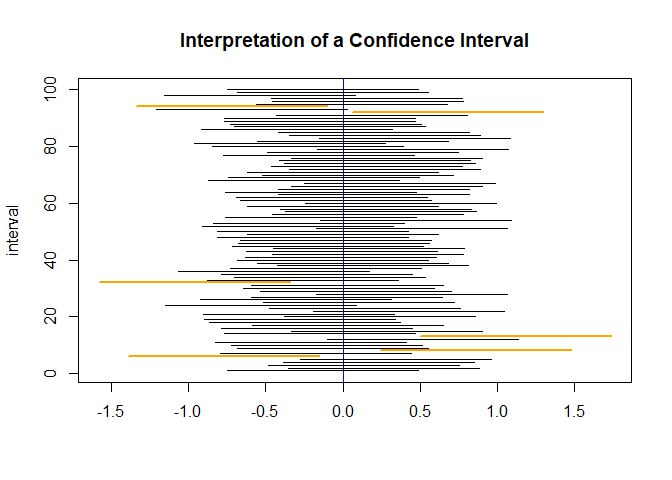

In this example, 94 out of 100 intervals for the population mean contained the true population mean of 0. As we construct more intervals, the proportion of intervals containing the true mean of 0 should get closer to 95%, on average.

Notice how the intervals move around. This is because each sample provides us with slightly different values, so the intervals move around because of the samples obtained.

Each interval either contains the true mean of 0 or it does not. But as a whole, the procedure we are using will produce confidence intervals that contain the true mean 95% of the time.

## Linking Hypothesis Tests and Confidence Intervals

CIs are directly linked to hypothesis tests.

A $100(1-\alpha)\%$ two-sided confidence interval for target parameter $\theta$ is linked with a hypothesis test of $H_0:\theta = c$ versus $H_a:\theta \neq c$ tested at level $\alpha$.

-   Any point that lies within the $100(1-\alpha)\%$ confidence interval for $\theta$ represents a value of $c$ for which the associated null hypothesis would not be rejected at significance level $\theta$.
-   Any point outside of the confidence interval is a value of $c$ for which the associated null hypothesis would be rejected.

Similar relationships hold for one-sided CIs and hypothesis tests.

**Example:**

Consider the 95% confidence interval for $\mu$ we previously constructed: \[-0.070,1.171\].

That interval is conceptually linked to the statistical test of $H_0:\mu = c$ versus $H_a:\mu \neq c$ using $\alpha =0.05$.

We reject $H_0$ for any hypothesized values of $c$ less than -0.070 or more than 1.171. We fail to reject $H_0$ for any values of $c$ between -0.070 and 1.171.

A confidence interval provides us with much of the same information as a hypothesis test, but it doesn’t provide the p-value or allow us to do hypothesis tests at different significance levels.

Confidence intervals are often preferred over hypothesis tests because they provide additional information in the form of plausible parameters values while giving us enough information to perform a hypothesis test.

**References**

Boos, Dennis D., and Leonard A. Stefanski. 2011. “P-Value Precision and Reproducibility.” *The American Statistician* 65 (4): 213–21. <https://doi.org/10.1198/tas.2011.10129>.

Gibson, Eric W. 2021. “The Role of p-Values in Judging the Strength of Evidence and Realistic Replication Expectations.” *Statistics in Biopharmaceutical Research* 13 (1): 6–18. <https://doi.org/10.1080/19466315.2020.1724560>.

Wackerly, Dennis D, William Mendhall, and Richard L Scheaffer. 2008. “Mathematical Statistics with Applications, 7th Edition.” Belmont, California: Cengage.